# Dimensionality Reduction
In this notebook, I will go through a few tutorials on dimensionality reduction. The goal is to reduce the dimension of the color histograms that I have for several classes of image objects to visualize them.

## Scikit learn tutorial
The following tutorial can be found [here](http://scipy-lectures.github.io/packages/scikit-learn/index.html).

### Loading an example dataset

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
"""
150 observations of 4 features:
    - sepal length
    - sepal width
    - petal length
    - petal width
"""
print iris.data.shape

(150, 4)


In [4]:
"""
150 observations of flower subtype:
    - Iris setosa
    - Iris versicolor
    - Iris virginica
"""
print iris.target.shape

(150,)


In [5]:
import numpy as np

In [6]:
np.unique(iris.target)

array([0, 1, 2])

Let's also take a look at the digits dataset, consisting of 1797 images where each is an 8x8 pixel image representing a hand-written digit.

In [7]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

In [8]:
import pylab as pl
%matplotlib inline

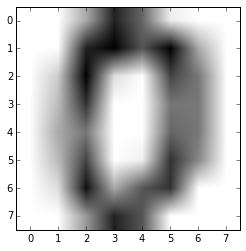

In [9]:
pl.imshow(digits.images[0], cmap=pl.cm.gray_r)

In [10]:
# Reshape each 8x8 image into a length 64 vector
data = digits.images.reshape((digits.images.shape[0], -1))

### Learning and predicting
We now want to learn from the training data and predict on new data. We can use `scikit-learn` to create an `estimator` and calling its `fit(X,Y)` method.

In [11]:
from sklearn import svm

In [12]:
# Creating a classifier
clf = svm.LinearSVC()
clf.fit(iris.data, iris.target)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0)

In [13]:
# Try to predict flower subtype from observations
clf.predict([[5.0, 3.6, 1.3, 0.25]])

array([0])

In [14]:
# Access model parameters via coefficients attribute
clf.coef_

array([[ 0.18424016,  0.45122855, -0.80793844, -0.4507142 ],
       [ 0.04860537, -0.88840014,  0.4063268 , -0.93927392],
       [-0.85069371, -0.98674535,  1.38089163,  1.86527453]])

### k-Nearest neighbors classifier
This is a very simple classifier where an observation is assigned the label that corresponds to the majority of its *k* nearest neighbors in *n*-dimensional space.

In [15]:
from sklearn import neighbors

In [16]:
# Create and fit a nearest-neighbor classifier
knn = neighbors.KNeighborsClassifier()
knn.fit(iris.data, iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [17]:
knn.predict([[0.1, 0.2, 0.3, 0.4]])

array([0])

In [18]:
perm = np.random.permutation(iris.target.size)
iris.data = iris.data[perm]
iris.target = iris.target[perm]

In [19]:
# Train on first 100 out of 150 observations
knn.fit(iris.data[:100], iris.target[:100])
# Test on observations 101-150
knn.score(iris.data[100:], iris.target[100:])

0.95999999999999996

### Support vector machines (SVM)

#### Linear SVMs
SVMs try to construct a hyperplane that maximizes the margin between two classes. It uses a subset of the input (observations closest to the hyperplane) called the support vectors.

In [20]:
svc = svm.SVC(kernel='linear')
svc.fit(iris.data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Let's test this out on the digits dataset:

In [21]:
svc = svm.SVC(kernel='linear')
svc.fit(digits.data[:1600], digits.target[:1600])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
svc.score(digits.data[1600:], digits.target[1600:])

0.949238578680203

#### Nonlinear SVMs (kernels)
Classes can't always be separated by hyperplanes, so we can also use nonlinear decision functions:

In [23]:
# Polynomial kernel
svc1 = svm.SVC(kernel='poly', degree=3)
svc1.fit(digits.data[:1600], digits.target[:1600])
svc1.score(digits.data[1600:], digits.target[1600:])

0.9441624365482234

In [24]:
# Radial basis function (RBF) kernel
svc2 = svm.SVC(kernel='rbf')
svc2.fit(digits.data[:1600], digits.target[:1600])
svc2.score(digits.data[1600:], digits.target[1600:])

0.40609137055837563

In the case of the handwritten digit classification, the linear SVM works better than the polynomial and RBF SVMs.

### K-means clustering
This algorithm divides the set into *k* clusters, assigning each observation to the cluster that minimizes the distance between that observation and the cluster mean. Then the cluster means are recomputed, and the observations reassigned. This is repeated until the clusters converge.

In [25]:
from sklearn import cluster

In [26]:
iris = datasets.load_iris()
k_means = cluster.KMeans(n_clusters=3, max_iter=300)
k_means.fit(iris.data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [27]:
print k_means.labels_[::10]

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [28]:
print iris.target[::10]

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


#### Application to image compression
Clustering is a way of choosing a small number of observations from the information. This can be used to "posterize" an image (conversion of continuous gradation of tone to several regions of fewer tones).

In [29]:
from scipy import misc
import matplotlib.pyplot as plt

In [30]:
lena = misc.lena().astype(np.float32)
print type(lena[1,1])
print lena.shape

<type 'numpy.float32'>
(512, 512)


In [31]:
X = lena.reshape((-1,1))
print X.shape
print type(X)

(262144, 1)
<type 'numpy.ndarray'>


In [32]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [33]:
# Put the cluster centroids into one vector
values = k_means.cluster_centers_.squeeze()
# Get the pixel cluster labels
labels = k_means.labels_

In [34]:
# For each pixel, set to nearest cluster centroid
lena_compressed = np.choose(labels, values)
# Reshape into original image size
lena_compressed.shape = lena.shape

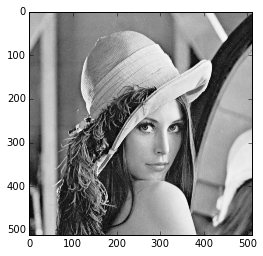

In [35]:
# Display original image
plt.imshow(lena, cmap=plt.cm.Greys_r)

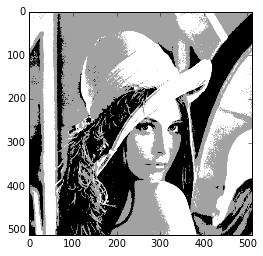

In [36]:
# Display quantized image
plt.imshow(lena_compressed, cmap=plt.cm.Greys_r)

### Dimesionality reduction w/ Principal Component Analysis (PCA)
Principal component analysis uses orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the original number of variables. [scikit-learn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

The first principal component has the largest possible variance (i.e., accounts for as much variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. [Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)

In [37]:
from sklearn import decomposition

In [38]:
pca = decomposition.PCA(n_components=2)
pca.fit(iris.data)

PCA(copy=True, n_components=2, whiten=False)

In [39]:
X = pca.transform(iris.data)

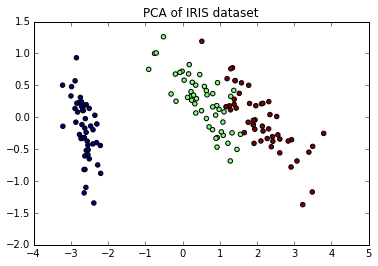

In [40]:
pl.scatter(X[:,0], X[:,1], c=iris.target)
plt.title('PCA of IRIS dataset')

## Manifold learning tutorial
The following tutorial can be found [here](http://scikit-learn.org/stable/modules/manifold.html).

In [41]:
from time import time
from matplotlib import offsetbox
from sklearn import (manifold, ensemble, lda, random_projection)

Manifold learning is an approach to non-linear dimensionality reduction. In this tutorial, we will work with the `sklearn digits` dataset.

In [42]:
digits = datasets.load_digits(n_class=6)
print digits.data.shape
print digits.target.shape
print np.unique(digits.target)

(1083, 64)
(1083,)
[0 1 2 3 4 5]


In [43]:
X = digits.data
Y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

In [44]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),\
                 color=plt.cm.Set1(Y[i] / 10.),\
                 fontdict={'weight': 'bold', 'size': 9})
    
    if hasattr(offsetbox, 'AnnotationBbox'):
        # Only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]]) # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # Don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            #ax.add_artist(imagebox)
    
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

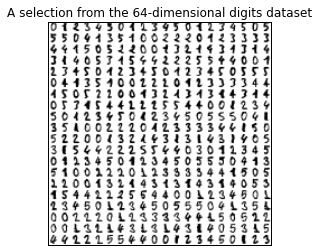

In [45]:
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

#### Random projection
A simple way to reduce the dimension of the dataset is to simply take a random projection. This will allow us to visualize the data in two (or another other number of) dimensions, but at the cost of losing much of the structure in the data.

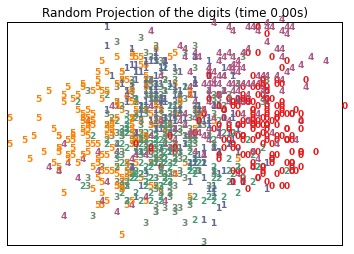

In [46]:
# Random 2D projection using a random unitary matrix
t0 = time()
rp = random_projection.SparseRandomProjection(n_components=2,\
                                              random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, 'Random Projection of the digits (time %.2fs)' % (time() - t0))

#### Principal Component Analysis (PCA)
PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the original number of variables.

PCA is an unsupervised process that looks for attributes that account for the most variance in the data.

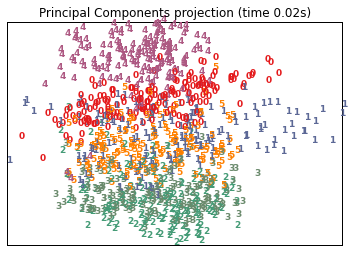

In [47]:
# Projection onto the first 2 principal components
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection (time %.2fs)" %
               (time() - t0))

#### Linear Discriminant Analysis (LDA)
Unlike PCA, LDA is a supervised algorithm that tries to identify the attributes that account for the most variance between classes. It uses class labels (is supervised).

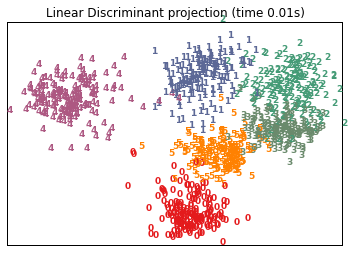

In [48]:
# Projection onto the first 2 linear discriminant components
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01 # Make X invertible
t0 = time()
X_lda = lda.LDA(n_components=2).fit_transform(X2, Y)
plot_embedding(X_lda, 'Linear Discriminant projection (time %.2fs)' %
              (time() - t0))

The LDA projection seems to work a lot better than PCA in this case. 

#### Isomap (isometric mapping)
Isomap is a low-dimensional embedding of a set of high-dimensional data points. It provides a simple method for estimating the intrinsic geometry of a data manifold based on a rough estimate of each data point's neighbors on the manifold.

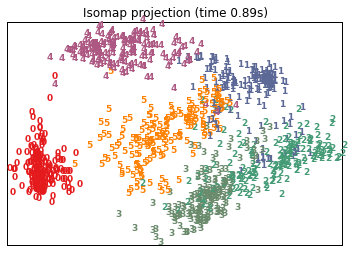

In [111]:
# Isomap projection
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
plot_embedding(X_iso, 'Isomap projection (time %.2fs)' % (time() - t0))

#### Locally-linear embedding (LLE)
LLE seeks a lower-dimensional projection of the data that preserves distances within local neighborhoods. It can be thought of as a series of local PCA which are globally compared to find the best non-linear embedding.

Reconstruction error: 1.63543338062e-06


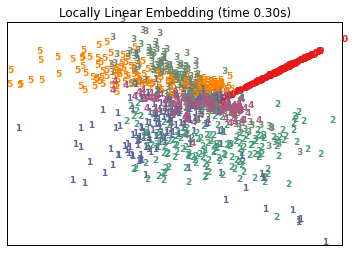

In [119]:
# LLE
t0 = time()
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,\
                                     method='standard')
X_lle = clf.fit_transform(X)
print 'Reconstruction error: {}'.format(clf.reconstruction_error_)
plot_embedding(X_lle, 'Locally Linear Embedding (time %.2fs)'\
              % (time() - t0))

#### Modified LLE
One well-known issue of the LLE is the regularization problem - when the number of neighbors is greater than the number of input dimensions, the matrix defining each local neighborhood is rank-deficient. Standard LLE deals with this by applying an arbitrary regularization parameter *r*, which is chosen relative to the trace of the local weight matrix. It can be shown that as $r\rightarrow0$, the solution converges to the desired embedding, but there is no guarantee that the optimal solution will be found for $r>0$.

Another method to address the regularization problem is to use multiple weight vectors in each neighborhood. This is the essence of *modified* LLE, or MLLE.

Reconstruction error: 0.360653925242


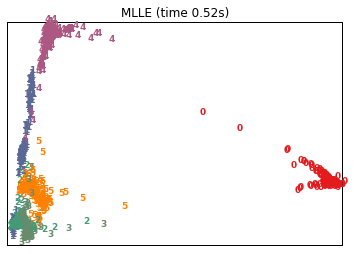

In [120]:
# MLLE
t0 = time()
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,\
                                     method='modified')
X_mlle = clf.fit_transform(X)
print 'Reconstruction error: {}'.format(clf.reconstruction_error_)
plot_embedding(X_mlle, 'MLLE (time %.2fs)' % (time() - t0))

#### Hessian Eigenmapping or Hessian-based LLE (HLLE)
HLLE is another method of solving the LLE regularization problem. It uses a hessian-based quadratic form as each neighborhood to recover the locally linear structure.

Reconstruction error: 0.212761731854


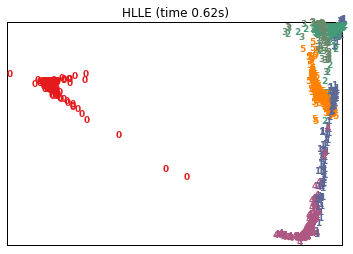

In [121]:
# HLLE
t0 = time()
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,\
                                     method='hessian')
X_hlle = clf.fit_transform(X)
print 'Reconstruction error: {}'.format(clf.reconstruction_error_)
plot_embedding(X_hlle, 'HLLE (time %.2fs)' % (time() - t0))

#### Spectral embedding (Laplacian Eigenmaps)
Spectral embedding finds a low-dimensional representation of the data using a spectral decomposition of the graph Laplacian. The graph generated can be considered to be a discrete approximation of the low-dimensional manifold in the high-dimensional space. Minimization of a cost function based on the graph ensures that points close to each other on the manifold are mapped close to each other in the low-dimensional space, preserving local distances.

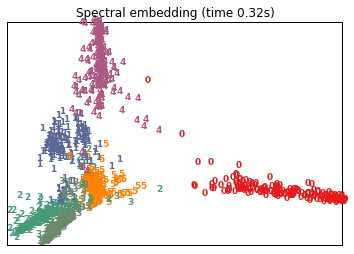

In [126]:
# Spectral embedding
t0 = time()
clf = manifold.SpectralEmbedding(n_components=2, random_state=0,\
                                eigen_solver='arpack')
X_spectral = clf.fit_transform(X)
plot_embedding(X_spectral, 'Spectral embedding (time %.2fs)' %\
              (time() - t0))

#### Local Tangent Space Alignment (LTSA)
LTSA is based on the intuition that when a manifold is correctly unfolded, all of the tangent hyperplanes to the manifold will become aligned. Instead of preserving neighborhood distances, LTSA seeks to characterize the local geometry at each neighborhood via its tangent space.

Reconstruction error: 0.212803307756


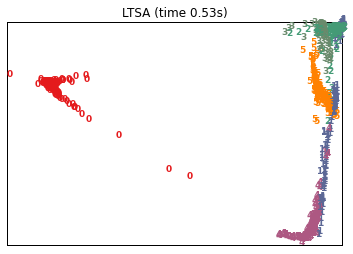

In [127]:
# LTSA embedding
t0 = time()
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,\
                                     method='ltsa')
X_ltsa = clf.fit_transform(X)
print 'Reconstruction error: {}'.format(clf.reconstruction_error_)
plot_embedding(X_ltsa, 'LTSA (time %.2fs)' % (time() - t0))

#### Multi-dimensional scaling (MDS)
MDS seeks a low-dimensional representation of the data in which the distances between objects are preserved as well as possible.

There are two types of MDS algorithms:
1. Metric
    * Distances between output points are set to be as close as possible to the similarity or dissimilarity data
2. Non-metric
    * Order of distances preserved, seek for monotonic relationship between distances in embedded space and similarities/dissimilarities

Stress: 137039013.673


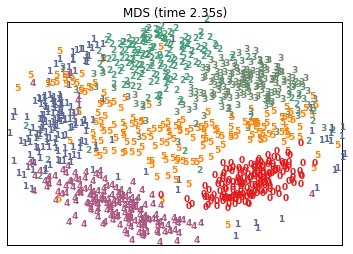

In [128]:
# MDS
t0 = time()
clf = manifold.MDS(n_components=2, metric=True, n_init=1, max_iter=100)
X_mds = clf.fit_transform(X)
print 'Stress: {}'.format(clf.stress_)
plot_embedding(X_mds, 'MDS (time %.2fs)' % (time() - t0))

#### Random trees embedding

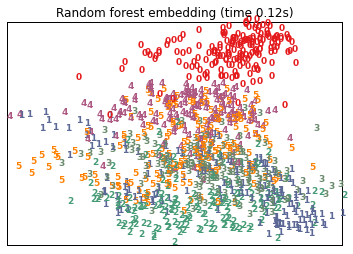

In [129]:
# Random trees embedding
t0 = time()
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,\
                                      max_depth=5)
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)
plot_embedding(X_reduced, 'Random forest embedding (time %.2fs)' %\
              (time() - t0))

#### t-distributed Stochastic Neighbor Embedding (t-SNE)
t-SNE converts affinities of data points to probabilities. The affinities in the original space are represented by Guassian joint probabilities and the affinities in the embedded space are represented by Student's t-distributions. The Kullback-Leibler (KL) divergence of the joint probabilities in the original space and the embedded space are minimized by gradient descent.

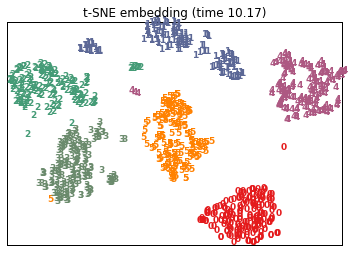

In [130]:
# t-SNE embedding
t0 = time()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, 't-SNE embedding (time %.2f)' % (time() - t0))